In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.api import OLS
from scipy.optimize import minimize
from scipy.stats import t
import seaborn as sns
import matplotlib.pyplot as plt

OLS Results:
Beta OLS: [-0.08738446  0.7752741 ]
Standard Deviation of OLS Residuals: 1.0062751598133177


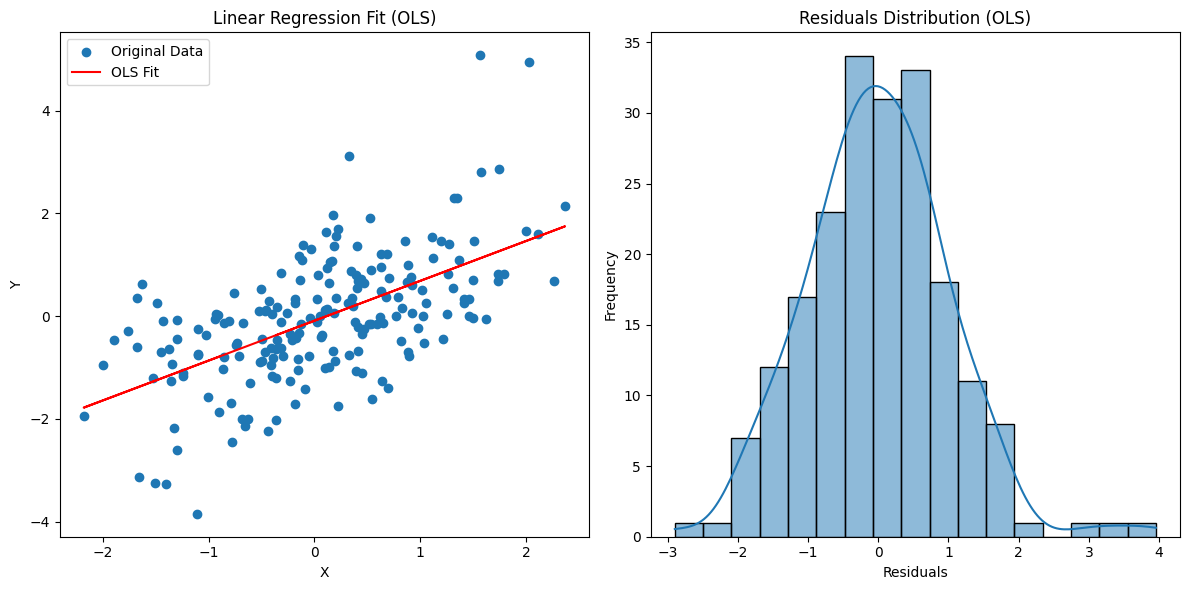

In [4]:
data_2 = pd.read_csv('data/regression.csv')

X_2 = data_2['x'].values
Y_2 = data_2['y'].values

X_2_ols = np.column_stack((np.ones_like(X_2), X_2))
ols_model = OLS(Y_2, X_2_ols).fit()
beta_ols = ols_model.params
std_ols_error = np.std(ols_model.resid, ddof=1)
r_squared = ols_model.rsquared

print("OLS Results:")
print(f"Beta OLS: {beta_ols}")
print(f"Standard Deviation of OLS Residuals: {std_ols_error}")



plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_2, Y_2, label='Original Data')
plt.plot(X_2, ols_model.predict(), color='red', label='OLS Fit')
plt.title('Linear Regression Fit (OLS)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

residuals = ols_model.resid
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (OLS)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

MLE Results Assuming Normality:
Beta MLE: [-0.08738448  0.77527414]
Standard Deviation of MLE Residuals: 1.0037562861903093
Pseudo R-squared: 0.15655314781257912


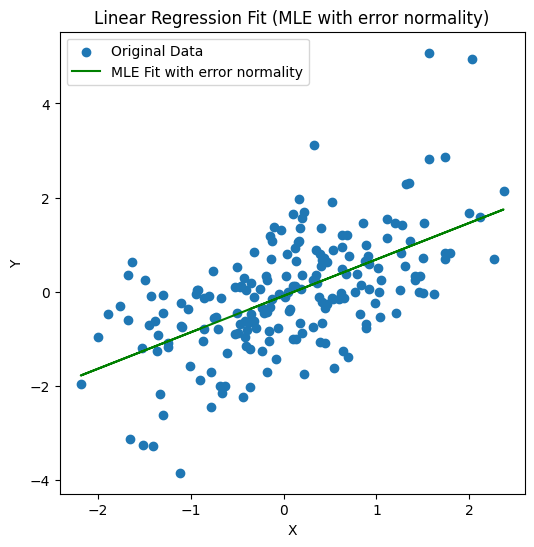

In [5]:
def neg_log_likelihood_normal(params, X, Y):
    beta0, beta1, sigma = params
    y_pred = beta0 + beta1 * X
    ll = -0.5 * len(Y) * np.log(2 * np.pi * sigma**2) - 0.5 * np.sum((Y - y_pred)**2) / sigma**2
    return -ll

initial_params_mle = [0, 1, 1]

result_mle = minimize(neg_log_likelihood_normal, initial_params_mle, args=(X_2, Y_2))
beta_mle = result_mle.x[:2]
sigma_mle = result_mle.x[2]
pseudo_r_squared = 1 - (neg_log_likelihood_normal(result_mle.x, X_2, Y_2) / neg_log_likelihood_normal([np.mean(Y_2), 0, sigma_mle], X_2, Y_2))

print("MLE Results Assuming Normality:")
print(f"Beta MLE: {beta_mle}")
print(f"Standard Deviation of MLE Residuals: {sigma_mle}")
print(f"Pseudo R-squared: {pseudo_r_squared}")


plt.figure(figsize=(6, 6))
plt.scatter(X_2, Y_2, label='Original Data')
plt.plot(X_2, beta_mle[0] + beta_mle[1] * X_2, color='green', label='MLE Fit with error normality')
plt.title('Linear Regression Fit (MLE with error normality)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()

MLE Results Assuming T Distribution:
Beta MLE: [-0.09619119  0.72657977]
Standard Deviation of MLE Residuals: 1.0
Degrees of Freedom: 17.35452068534015


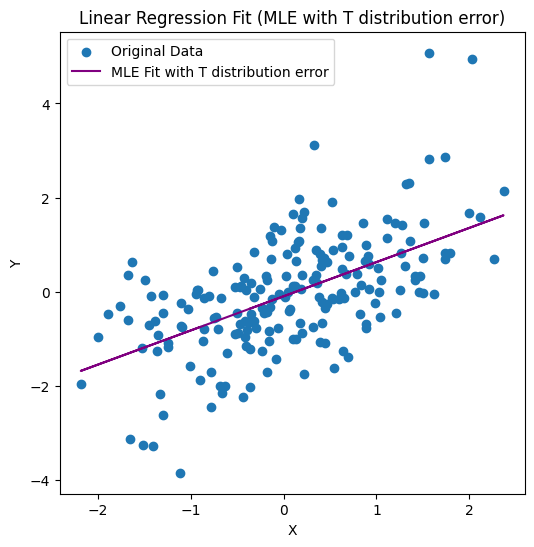

In [6]:
def neg_log_likelihood_t(params, X, Y):
    beta0, beta1, sigma, df = params
    y_pred = beta0 + beta1 * X
    residuals = Y - y_pred
    ll = np.sum(t.logpdf(residuals, df))
    return -ll

initial_params_t = [0, 1, 1, 10]

result_t = minimize(neg_log_likelihood_t, initial_params_t, args=(X_2, Y_2))
beta_t, sigma_t, df_t = result_t.x[:2], result_t.x[2], result_t.x[3]

print("MLE Results Assuming T Distribution:")
print(f"Beta MLE: {beta_t}")
print(f"Standard Deviation of MLE Residuals: {sigma_t}")
print(f"Degrees of Freedom: {df_t}")


plt.figure(figsize=(6, 6))
plt.scatter(X_2, Y_2, label='Original Data')
plt.plot(X_2, beta_t[0] + beta_t[1] * X_2, color='purple', label='MLE Fit with T distribution error')
plt.title('Linear Regression Fit (MLE with T distribution error)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()